<a href="https://colab.research.google.com/github/nedokormysh/GB_Libraries_python_for_DS/blob/CourseProject/Libraries_python_DS_CourseWork_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение библиотек

In [606]:
# Основные библиотеки
import numpy as np
import pandas as pd
import random

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
# Метрика качества
from sklearn.metrics import r2_score as r2

from scipy.stats import mode

# Разделение датасета
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Оптимизация данных

In [5]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

# Загрузка, предобработка данных

## Функция подсчёта метрик

In [98]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Загрузка данных

In [666]:
TRAIN_DATASET_PATH = '/content/drive/MyDrive/Libraries_python_DS_CourseWork/train.csv'
TEST_DATASET_PATH = '/content/drive/MyDrive/Libraries_python_DS_CourseWork/test.csv'
SAMPLE_DATASET_PATH = '/content/drive/MyDrive/Libraries_python_DS_CourseWork/sample_submission.csv'

In [667]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df_test = pd.read_csv(TEST_DATASET_PATH)

In [668]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [523]:
print(f'В обучающем датафрейме {df_train.shape[0]} строк и {df_train.shape[1]} столбцов')

В обучающем датафрейме 10000 строк и 20 столбцов


In [669]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [670]:
print(f'В тестовом датафрейме {df_test.shape[0]} строк и {df_test.shape[1]} столбцов')

В тестовом датафрейме 5000 строк и 19 столбцов


### Разница в количестве признаков между train и test

Таким образом выполняется:

In [671]:
df_train.shape[1] - 1 == df_test.shape[1]

True

## Признаки нашего датасета

In [527]:
# print('Названия столбцов в обучающем датафрейме\n',df_train.columns)
nl = '\n'
print(f"Названия столбцов в обучающем датафрейме {nl}{df_train.columns}")

Названия столбцов в обучающем датафрейме 
Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')


**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

Задача регрессии на прогнозирование стоимости домов. Метрикой является коэффициент корреляции R2.

Наблюдения - это строки. Признаки - столбцы.

In [ ]:
# df_train.index

In [ ]:
# df_train.dtypes

## Уменьшение объема памяти, который занимает датасет

In [528]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [672]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [673]:
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


##Приведение типов.

In [529]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [530]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_train['Ecology_2'] = df_train['Ecology_2'].astype(str)
df_train['Ecology_3'] = df_train['Ecology_3'].astype(str)
df_train['Shops_2'] = df_train['Shops_2'].astype(str)

In [531]:
df_train.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [532]:
num_feat = list(df_train.select_dtypes(exclude='object').columns)
# obj_feat = list(df_train.select_dtypes(include=('object', 'category')).columns)
nom_feat = list(df_train.select_dtypes(include='object').columns)
target = 'Price'

print(f'Числовые признаки: {num_feat}')
# print(f'Нечисловые признаки: {obj_feat}')
print(f'Номинативные признаки: {nom_feat}')

Числовые признаки: ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price']
Номинативные признаки: ['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']


# **EDA и очистка данных**

## Удаление дубликатов

In [70]:
df_train.shape

(10000, 20)

In [71]:
df_train = df_train.drop_duplicates()
df_train.shape

(10000, 20)

Дубликатов нет.

## Распределение целевой переменной

In [ ]:
# round(df_train['Price'].mean(), 2)
# round(df_train.Price.median(), 2)
# round(df_train.Price.mode()[0], 2)

In [ ]:
# mode(df_train.Price)[0][0]

In [ ]:
# df_train.Price.head()

In [533]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = round(df_train.Price.median(), 2)
# target_mode = df_train['Price'].mode()[0]
# target_mode = round(df_train['Price']).mode()[0]
target_mode = round(df_train.Price, -1).mode()[0]

In [534]:
print(f'Среднее значение целевой переменной = {target_mean}')
print(f'Медиана целевой переменной = {target_median}')
print(f'Мода целевого значения = {target_mode}')

Среднее значение целевой переменной = 214138.86
Медиана целевой переменной = 192269.64
Мода целевого значения = 181630.0


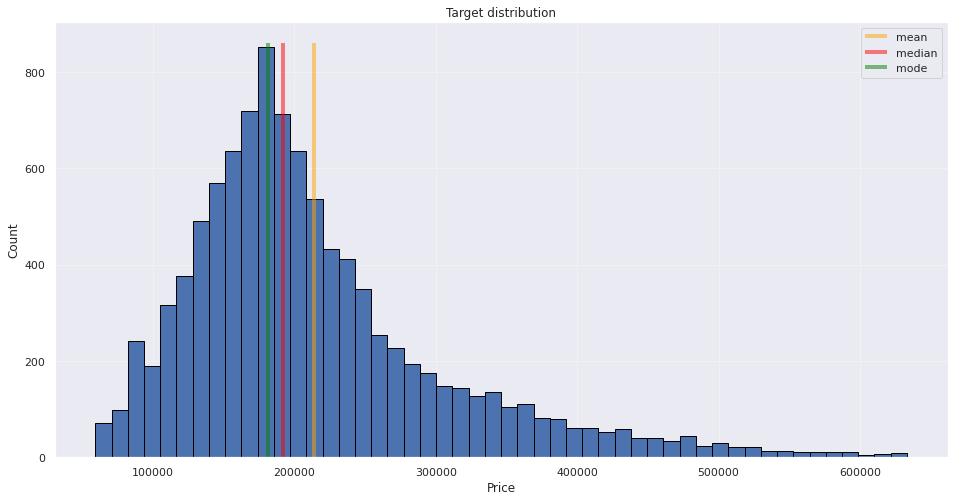

In [535]:
plt.figure(figsize = (16, 8))

y = df_train['Price']
plt.hist(y, bins=50, edgecolor='black')
# df_train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

# plt.plot([target_mean] * 85, y, label='mean',  linewidth=4)
# plt.plot([target_median] * 10, y, label='median',  linewidth=4)
# plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.vlines(target_mean, 0, 860, label='mean', linewidth=4, colors='orange', alpha=0.5)
plt.vlines(target_median, 0, 860, label='median', linewidth=4, colors='red', alpha=0.5)
plt.vlines(target_mode, 0, 860, label='mode', linewidth=4, colors='green', alpha=0.5)

# Decorations
plt.title('Target distribution')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Первоначально выбросов в целевой переменной нет. Несимметричное распределение.

In [ ]:
# plt.figure(figsize = (16, 8))

# sns.distplot(df_train['Price'], bins=30)

# y = np.linspace(0, 0.000005, 10)
# plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
# plt.plot([target_median] * 10, y, label='median',  linewidth=4)
# plt.plot([target_mode] * 10, y, label='mode', linewidth=4)
# # print(y.shape)

# plt.title('Distribution of median_house_value')
# plt.legend()
# plt.show()

## Количественные признаки

In [536]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Корреляция

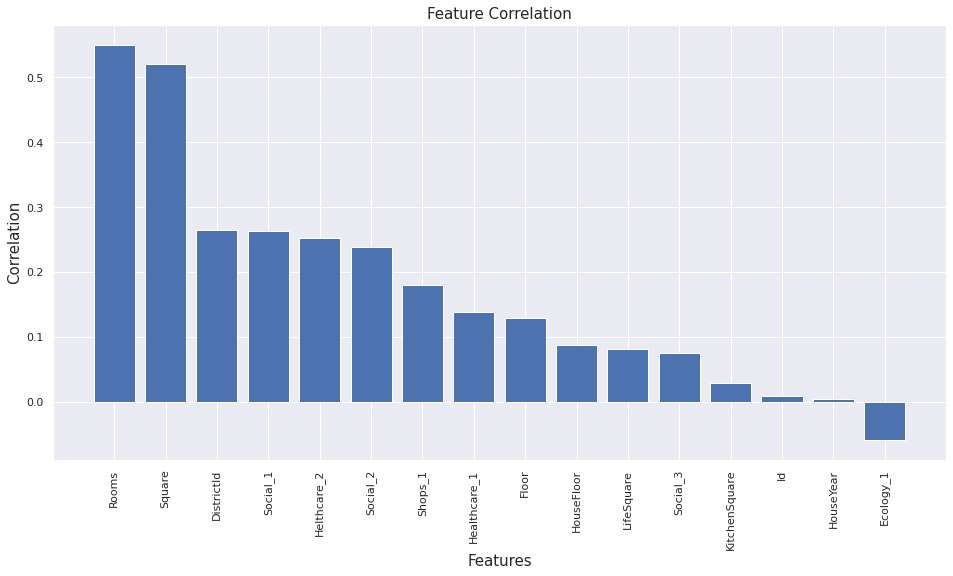

In [674]:
# Prepare Data
correlation = df_train.corrwith(df_train['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

# Draw plot
plt.figure(figsize = (16,8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')

# Decorations    
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature Correlation', fontsize=15)
plt.show()

Максимальная корреляция у нас наблюдается в зависимости от количества комнат и площади.

Text(0.5, 1.0, 'Correlation matrix')

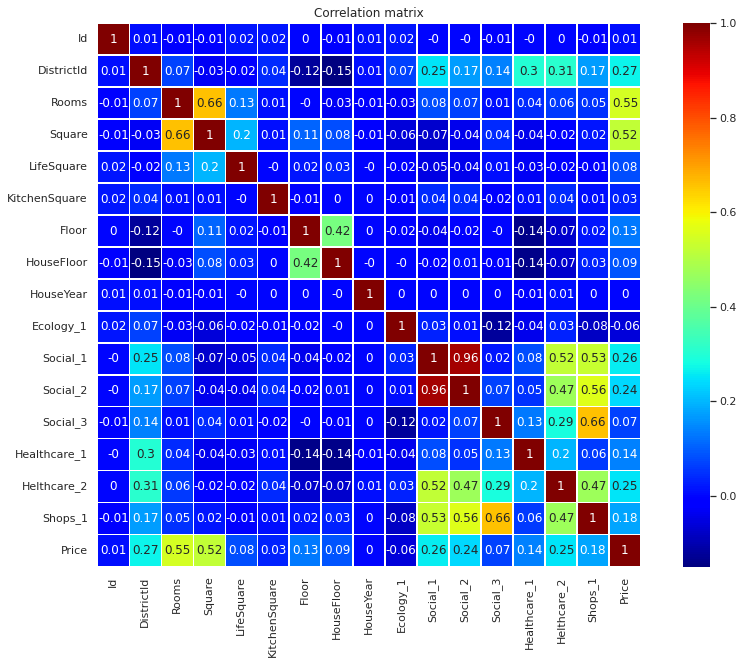

In [676]:
# Prepare Data
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0


# corrmat = df_train.loc[:, df_train.columns != 'Id'].corr()
# plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=1, square=True)

# Draw plot
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=0.4, cmap='jet')

# Decorations  
plt.title('Correlation matrix')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',

На хитмап также можно наблюдать, что максимальная корреляция у нас наблюдается в зависимости от площади и количества комнат (эти признаки коррелируют между собой.)

Также стоит отметить слабую зависимость от Ecology_1 и House_Year.

Забегая вперёд можем отметить Healthcare_1 также имеет слабую взаимосвязь c таргетом и остальными фичами.

In [78]:
# df_train = df_train.drop(['LifeSquare'], axis = 1)

## Номинативные признаки

In [539]:
nom_feat

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [540]:
def nom_feat_value_counts(nom_feat):
  for el in range(1, len(nom_feat)):
    # print(df_train[el].value_counts())
    # print(f'Уникальные значения номинативного признака {nom_feat[el]}:{nl * 2}{df_train[nom_feat[el]].value_counts()}{nl}')
    # print('\033[1m' + 'Eyb')
    print('\033[1m' + f'Уникальные значения номинативного признака {nom_feat[el]}:{nl * 2}'
     + '\033[0m' + f'{df_train[nom_feat[el]].value_counts()}{nl}')
    print('-' * 60)

In [476]:
nom_feat_value_counts(nom_feat)

Уникальные значения номинативного признака DistrictId:

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
209      1
199      1
205      1
196      1
Name: DistrictId, Length: 205, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Ecology_2:

B    9903
A      97
Name: Ecology_2, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Ecology_3:

B    9725
A     275
Name: Ecology_3, dtype: int64

------------------------------------------------------------
Уникальные значения номинативного признака Shops_2:

B    9175
A     825
Name: Shops_2, dtype: int64

------------------------------------------------------------


In [ ]:
# df_train['DistrictId'].value_counts()

In [ ]:
# df_train['Ecology_2'].value_counts()

In [ ]:
# df_train['Ecology_3'].value_counts()

In [ ]:
# df_train['Shops_2'].value_counts()

## Обработка выбросов

In [677]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839522,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315720,21.058716,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,7887.0,37.199665,86.241219,0.370619,22.769833,32.781261,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560839,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.776200,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218670e-01


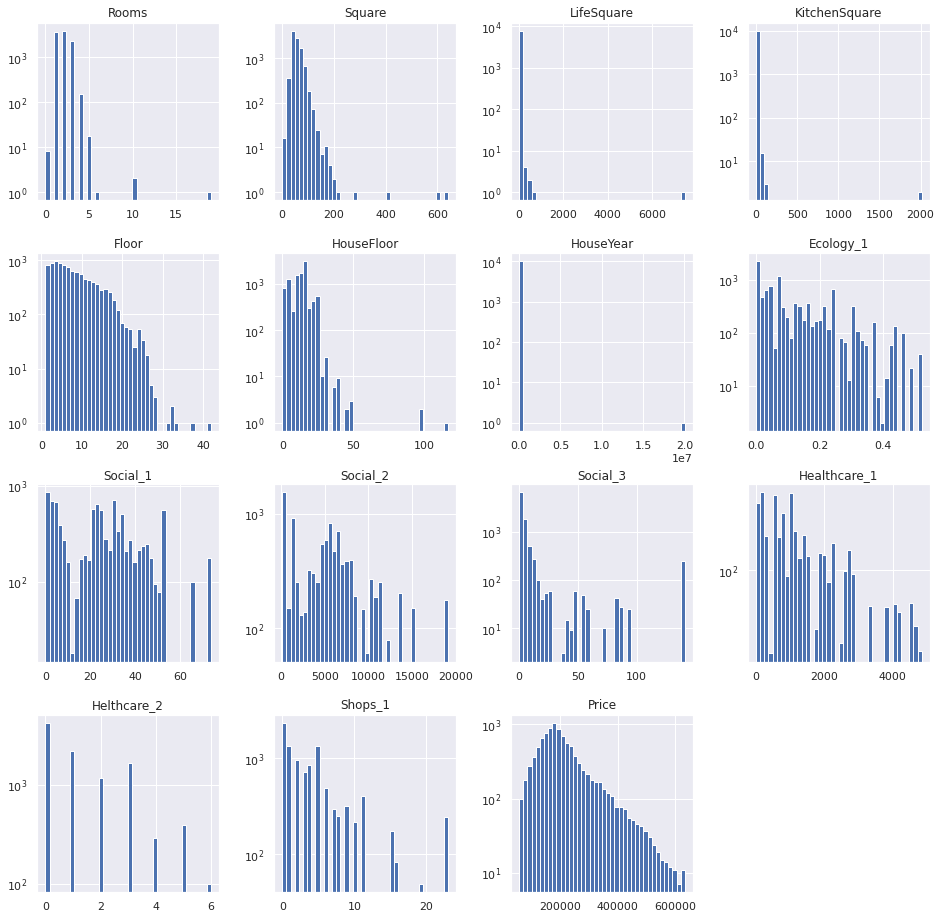

In [678]:
df_train[num_feat].hist(bins=40, figsize=(16, 16), log = True)

plt.show()

Нерациональные выбросы HouseYear, KitchenSquare и признаки с необоснованно выскоими значениями наблюдаются HouseFloor, LifeSquare, Rooms, Square

In [ ]:
# df_train.query('Rooms > 5')

https://leftjoin.ru/all/outliers-detection-in-python/

Рассмотрим данные подробнее

### HouseYear

In [392]:
# df_train['HouseYear'].hist(figsize=(4, 4), log=True)
# plt.title('HouseYear')
# plt.xlabel('year')

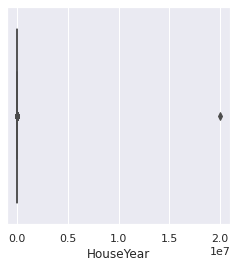

In [679]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_train['HouseYear'], whis=1.5, orient='h')

In [680]:
df_train.corr()['Price']['HouseYear']

0.00430539418333514

Т.е. у нас есть выбросы в этой фиче.

In [ ]:
# df_train.boxplot(column='HouseYear', rot=90)

In [681]:
df_train['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int32

In [682]:
df_train.loc[df_train['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375
9163,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250


Предположим, что значение 20052011 - это ошибка. Заменим 20052011 на 2011 предполагая, что 20052011 - это годы строительства.

Также заменим значение 4968 на 1968.

In [683]:
df_train.loc[df_train['HouseYear'] == 20052011, 'HouseYear'] = 2011
df_train.loc[df_train['HouseYear'] == 4968, 'HouseYear'] = 1968

In [142]:
# df_train[df_train['Id'] == '11809']

In [143]:
# df_train.head()

In [684]:
df_filter = df_train['Id'].isin(['10814', '11607'])
df_train[df_filter]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,1968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375
9163,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,2011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250


In [685]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

In [686]:
df_train.corr()['Price']['HouseYear']

0.036633776605036146

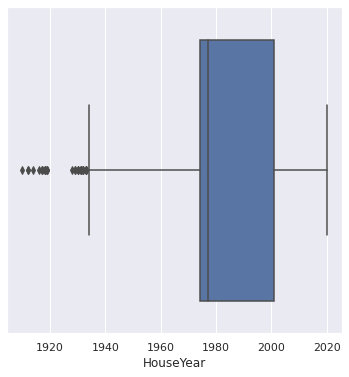

In [687]:
plt.figure(figsize=(6, 6))
sns.boxplot(df_train['HouseYear'], whis=1.5, orient='h')

### KitchenSquare

In [315]:
# df_train['KitchenSquare'].hist(figsize=(4, 4), log=True)
# plt.title('KitchenSquare')
# plt.xlabel('Square')

In [688]:
df_train.corr()['Price']['KitchenSquare']

0.028864154932784696

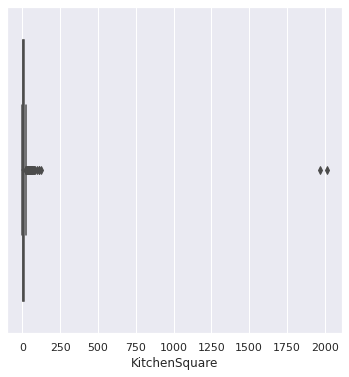

In [689]:
plt.figure(figsize=(6, 6))
sns.boxplot(df_train['KitchenSquare'], whis=1.5, orient='h')

In [690]:
(df_train['KitchenSquare'] > 1750).sum()

2

In [691]:
df_train[df_train['KitchenSquare'] > 1750]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6505,14679,81,1.0,32.276665,19.278395,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.554688
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484375


In [555]:
df_train[df_train.KitchenSquare > df_train.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2785,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
5273,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
6505,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
9520,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207


У нас есть два значения площади кухни, которые сильно отличаются от средних. Также у нас есть значения площади кухни, которые превышают значение общей площади квартиры. Заменим эти значения на значение медианы.

In [692]:
query_kitchen_square = df_train['KitchenSquare'] > df_train['KitchenSquare'].quantile(.975)
        
df_train.loc[query_kitchen_square, 'KitchenSquare'] = df_train['KitchenSquare'].median()

In [693]:
df_train.corr()['Price']['KitchenSquare']

0.28788778283654626

In [494]:
# df_train['KitchenSquare'].value_counts()

Осталась проблема с минимальным размером кухни. Заменим все кухни с площадью меньше 3 на 3.

In [694]:
df_train.loc[df_train['KitchenSquare'] < 4, 'KitchenSquare'] = 4

In [695]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.520075
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

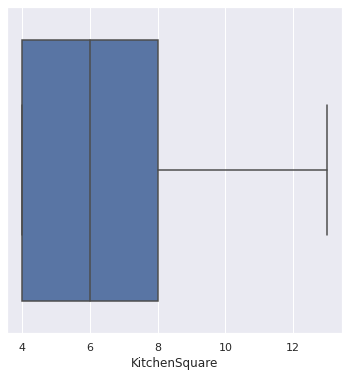

In [696]:
plt.figure(figsize=(6, 6))
sns.boxplot(df_train['KitchenSquare'], whis=1.5, orient='h')

In [ ]:
# df_train['KitchenSquare'].value_counts()

### Square

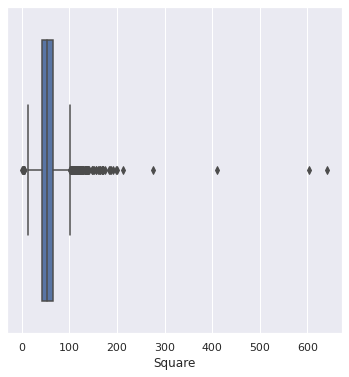

In [697]:
plt.figure(figsize=(6, 6))
sns.boxplot(df_train['Square'], whis=1.5, orient='h')

In [698]:
df_train['Square'].quantile(0.995)

132.82090370178219

In [699]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.520075
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

In [700]:
df_train['Square_outlier'] = 0
df_train.loc[df_train['Square'] > df_train['Square'].quantile(0.995), 'Square_outlier'] = 1

In [701]:
df_train[df_train['Square'] > df_train['Square'].quantile(0.995)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier
403,13434,13,5.0,183.382278,100.985504,6.0,2,6.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,622888.812500,1
599,4450,56,4.0,138.994995,NaN,4.0,16,1.0,1977,0.000000,B,B,23,5067,4,NaN,2,6,B,571939.937500,1
726,28,9,2.0,604.705994,NaN,4.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.250000,1
730,14181,62,3.0,156.636581,153.685837,4.0,1,3.0,2005,0.072158,B,B,2,629,1,NaN,0,0,A,502523.562500,1
1352,10659,93,3.0,136.459106,NaN,4.0,2,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,200303.359375,1


In [637]:
# df_train[df_train['Square'] > 300]

In [702]:
query_square = df_train['Square'] > df_train['Square'].quantile(.995)
df_train.loc[query_square, 'Square'] = df_train['Square'].median()

In [642]:
# query_square = df_train['Square'] > 300
#         #  df_train['Square'].quantile(.975)
# df_train.loc[query_square, 'Square'] = df_train['Square'].median()

In [703]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.081292
KitchenSquare    0.298118
Name: Price, dtype: float64

### LifeSquare

In [415]:
# df_train['SquareKitchenSquare'] = df_train['Square'] - df_train['KitchenSquare']
# df_train.head()

In [ ]:
# df_train[(df_train['LifeKitchenSquare']) > df_train['Square']]

In [ ]:
# df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['SquareKitchenSquare']

In [704]:
# df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train['SquareKitchenSquare']
# df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train['SquareKitchenSquare'].median()

# square_index = df_train[df_train['LifeSquare'] > df_train['Square']].index
# df_train.loc[square_index, 'Square'], df_train.loc[square_index, 'LifeSquare'] = df_train.loc[square_index, 'LifeSquare'], df_train.loc[square_index, 'Square']

df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train['LifeSquare'].median()

In [705]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.441857
KitchenSquare    0.298118
Name: Price, dtype: float64

In [505]:
# df_train.LifeKitchenSquare.isnull().sum()

In [ ]:
# df_train[(df_train['LifeSquare']) > df_train['Square']]

In [ ]:
# df_train.loc[df_train['Square'] < df_train['LifeSquare'], 'LifeSquare'] = (df_train['Square'] - df_train['KitchenSquare'])

In [ ]:
# df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = (df_train['Square'] - df_train['KitchenSquare'])

In [165]:
# df_train[(df_train['LifeSquare']) == df_train['Square']]

In [167]:
# df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare', 'LifeKitchenSquare']]

In [166]:
# query_life_square = df_train['LifeSquare'] > df_train['Square']

In [168]:
# df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

In [169]:
# df_train['Square_tuned'] = df_train['LifeSquare'] + df_train['KitchenSquare']
# df_train.head()

In [170]:
# df_train.loc[df_train['Square'] > df_train['Square_tuned'], 'Square_tuned'] = df_train['Square']
# df_train.head()

In [172]:
#  df_train.loc[df_train['Square_tuned'].isnull(), 'Square_tuned'] = df_train['Square']
#  df_train.head()

In [173]:
# df_train.loc[df_train['LifeSquare'] > df_train['Square_tuned']]

In [174]:
# df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare', 'Square_tuned']]

In [ ]:
# df_train.loc[df_train['Square'] < df_train['Square_tuned'], 'Square'] = df_train['Square_tuned']

In [175]:
# df_train.iloc[[0]]

In [176]:
# df_train.iloc[[9960]]

In [177]:
# df_train['Square_tuned'].isnull()

In [178]:
# df_train['Square'].isnull()

In [ ]:
# df_train.loc[query_life_square, 'Square'] = df_train['LifeSquare']

In [179]:
# df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

In [180]:
# df_train.loc[df_train['Id'] == 847]

In [181]:
# df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare', 'Square_tuned']]

### Floor, HouseFloor

In [706]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.088280
Name: Price, dtype: float64

In [ ]:
# df_train['HouseFloor'].hist(figsize=(4, 4), bins=30, log=True)
# plt.title('HouseFloor')
# plt.xlabel('floor')

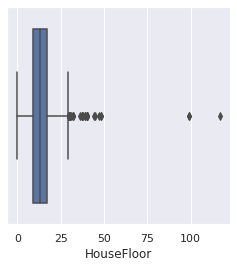

In [707]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_train['HouseFloor'], whis=1.5, orient='h')

In [708]:
(df_train['HouseFloor'] == 0).sum()

269

In [709]:
(df_train['HouseFloor'] > 75).sum()

3

У нас есть 269 значений, где нумерация этажности дома начинается с нуля. А также 3 значения высоты дома значительно отклоняется от среднего.

In [710]:
df_train[df_train['HouseFloor'] > 75]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier
746,9300,74,2.0,71.747871,32.781261,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.90625,0
1678,78,30,2.0,65.773750,32.781261,4.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.37500,0
4657,10806,5,1.0,51.944588,48.709602,4.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.12500,0


In [ ]:
# house_floor_mean = df_train['HouseFloor'].mean()
# house_floor_median = df_train['HouseFloor'].median()
# house_floor_mode = df_train['HouseFloor'].mode()[0]

In [ ]:
# print(f'Среднее значение HouseFloor = {house_floor_mean}')
# print(f'Медиана HouseFloor = {house_floor_median}')
# print(f'Мода HouseFloor = {house_floor_mode}')

In [ ]:
# df_train.loc[df_train['HouseYear'] == 1977, ['HouseFloor']].describe()

Отметим, что все здания с завышенным значением этажности были построены в 1977. Найдём моду по этажности домов за 1977 год без учёта выбросов. В принципе, она совпадает с самым часто встречающимся значением этажности за все года.

In [711]:
query_house_floor = (df_train['HouseYear'] == 1977) & (df_train['HouseFloor'] < 75)
house_floor_mode_1977 = df_train.loc[query_house_floor, 'HouseFloor'].mode()[0]
house_floor_mode_1977

17.0

In [712]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier
17,1190,8,2.0,49.396000,28.299601,5.0,6,5.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.921875,0
19,367,45,1.0,42.367290,40.012527,4.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.984375,0
21,8471,20,3.0,75.611061,47.494621,8.0,11,9.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.250000,0
24,4717,27,1.0,44.203945,NaN,4.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.562500,0
25,4521,6,2.0,65.409966,NaN,4.0,18,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.265625,0


In [713]:
(df_train['Floor'] > df_train['HouseFloor']).sum()

1825

Также у нас есть 1825 значений таких, что этаж, на котором расположена квартира, превышает количество этажей в доме.

Добавим новый столбец, в котором присвоим для наших выбросов значение 1. А для данных с неподозрительными значениями в новом столбце проставим 0.

In [714]:
df_train['HouseFloor_outlier'] = 0
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor_outlier'] = 1
df_train.loc[df_train['Floor'] > 75, 'HouseFloor_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier,HouseFloor_outlier
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000,0,0
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0
3,2352,1,1.0,40.409908,NaN,4.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000,0,0
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750,0,0


Заменим значение 0 этажа на 1.

In [715]:
# df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = 1

In [716]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.088494
Name: Price, dtype: float64

In [717]:
df_train.loc[df_train['HouseFloor'] > 75, 'HouseFloor'] = house_floor_mode_1977

In [718]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.128715
HouseFloor    0.089736
Name: Price, dtype: float64

Поменяем местами этажность дома и этаж на котором находится квартира. Это работает чуть лучше, чем просто поставить рандомный этаж от 1 до максмума.

In [719]:
floors_index_outliers = df_train[df_train['HouseFloor'] < df_train['Floor']].index
df_train.loc[floors_index_outliers, 'Floor'], df_train.loc[floors_index_outliers, 'HouseFloor'] = df_train.loc[floors_index_outliers, 'HouseFloor'], df_train.loc[floors_index_outliers, 'Floor']

In [720]:
df_train.corr()['Price'][['Floor', 'HouseFloor']]

Floor         0.110054
HouseFloor    0.115803
Name: Price, dtype: float64

In [ ]:
# df_train.loc[floors_index_outliers, 'Floor'] = df_train.loc[floors_index_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

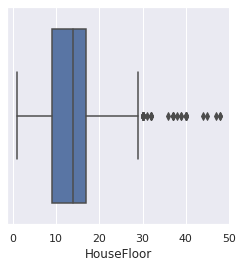

In [721]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_train['HouseFloor'], whis=1.5, orient='h')

### Rooms

In [722]:
df_train.corr()['Price'][['Rooms']]

Rooms    0.550291
Name: Price, dtype: float64

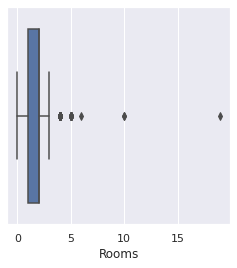

In [723]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_train['Rooms'], whis=1.5, orient='h')

In [724]:
df_train['Rooms'].value_counts().sort_values()

19.0       1
6.0        1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

У нас есть выбросы, а также есть значение 0. Обозначим эти как за ошибочные значения.

In [726]:
df_train.loc[(df_train['Rooms'] >= 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier,HouseFloor_outlier
2004,5927,57,10.0,59.056976,36.223072,10.0,22.0,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.312500,0,0
2728,14865,9,10.0,60.871265,38.420681,10.0,2.0,3.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.265625,0,1
6088,8491,1,19.0,42.006046,21.779287,7.0,17.0,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.617188,0,0
8794,14003,99,6.0,59.414333,38.702244,6.0,7.0,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.968750,0,0


In [727]:
df_train['Rooms_outlier'] = 0
df_train.loc[(df_train['Rooms'] == 0) | (df_train['Rooms'] >= 6), 'Rooms_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_outlier,HouseFloor_outlier,Rooms_outlier
0,11809,27,3.0,115.027313,NaN,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000,0,0,0
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0
3,2352,1,1.0,40.409908,NaN,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000,0,0,0
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750,0,0,0


In [728]:
df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
# df_train.loc[df_train['Rooms'] >= 6, 'Rooms'] = df_train['Rooms'].median()

In [729]:
df_train.loc[df_train['Rooms'].isin([1, 2, 3, 4, 5]), ['Rooms', 'Price','Square']].groupby('Rooms').median()

,Price,Square
Rooms,,
1.0,155012.203125,40.412437
2.0,200320.750000,55.818565
3.0,268723.156250,77.207993
4.0,377524.250000,96.502792
5.0,455355.625000,101.837463


In [269]:
# round(a['Square']) == 56

Заменим значения с количеством комнат больше шести на значения количества  комнат близких по площади квартир.

In [730]:
df_train.loc[(df_train['Rooms'] >= 6) & (df_train['Square'] >= 50), 'Rooms'] = 2
df_train.loc[(df_train['Rooms'] >= 6) & (df_train['Square'] < 50), 'Rooms'] = 1

In [731]:
df_train.corr()['Price'][['Rooms']]

Rooms    0.57166
Name: Price, dtype: float64

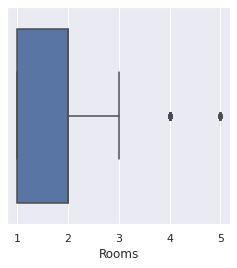

In [732]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_train['Rooms'], whis=1.5, orient='h')

## Обработка отстутсвующих значений.

Составим карту отсутствующих значений.

Text(30.5, 0.5, 'Values')

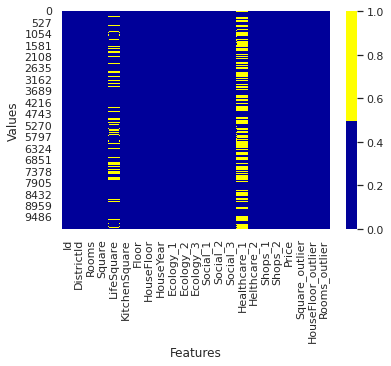

In [733]:
# cols = df_train.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df_train[df_train.columns].isnull(), cmap=sns.color_palette(colours))
# sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

plt.xlabel('Features')
plt.ylabel('Values')

Видно, что у нас есть отсутствующие значения в признаках LifeSquare и Healthcare_1. Найдём долю отсутсвующих значений в по признакам.

Стоит помнить, что в случае, если пропусков у признака слишком много (более 70%), такой признак удаляют. Проверим, насколько полны наши признаки: метод isnull() пройдется по каждой ячейке каждого столбца и определит, кто пуст, а кто нет, составив датафрейм такого же размера, состоящий из True / False. Метод mean() суммирует все значения True, определит концентрацию пропусков в каждом столбце. На 100 мы умножаем, чтобы получить значение в процентах:

In [734]:
# df_train.isnull().mean() * 100
colums_with_na = ['LifeSquare', 'Healthcare_1']

# for col in df_train.columns:
#     # pct_missing = np.mean(df_train[col].isnull())
#     print('{} - {}%'.format(col, round(np.mean(df_train[col].isnull()) * 100, 2)))

for col in colums_with_na:
    # pct_missing = np.mean(df_train[col].isnull())
    print('{} - {}%'.format(col, round(np.mean(df_train[col].isnull()) * 100, 2)))  

LifeSquare - 21.13%
Healthcare_1 - 47.98%


Можем вспомнить слабую корреляцию Healthcare_1 с остальными фичами и, учитывая большое количество пропусков данных в этой фиче, удалим этот столбец.

В данном случае у нас нет признаков с более 70 процентами пропусков, таких, что мы могли бы выбросить

https://www.helenkapatsa.ru/razvedochnyy-analiz-dannykh-chast-1/

In [278]:
# round(df_train.corr()['Healthcare_1'].sort_values(), 3)

In [735]:
df_train.drop(['Healthcare_1'], axis = 1, inplace=True)

In [736]:
# df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['SquareKitchenSquare']
# df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['SquareKitchenSquare'].median()
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['LifeSquare'].median()

In [737]:
df_train.corr()['Price'][['Square', 'LifeSquare', 'KitchenSquare']]

Square           0.597803
LifeSquare       0.408973
KitchenSquare    0.298118
Name: Price, dtype: float64

In [452]:
# colours = ['#000099', '#ffff00'] 
# sns.heatmap(df_train[df_train.columns].isnull(), cmap=sns.color_palette(colours))
# # sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

# plt.xlabel('Features')
# plt.ylabel('Values')

In [450]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,SquareKitchenSquare,HouseFloor_outlier,Rooms_outlier
0,11809,27,3.0,115.027313,32.781261,10.0,4.0,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.875000,105.027313,0,0
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.546875,31.832523,0,0
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.718750,68.342216,0,0
3,2352,1,1.0,40.409908,32.781261,4.0,10.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.000000,36.409908,0,0
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.093750,55.285065,0,0


In [601]:
df_train.isnull().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
HouseFloor_outlier    0
Rooms_outlier         0
dtype: int64

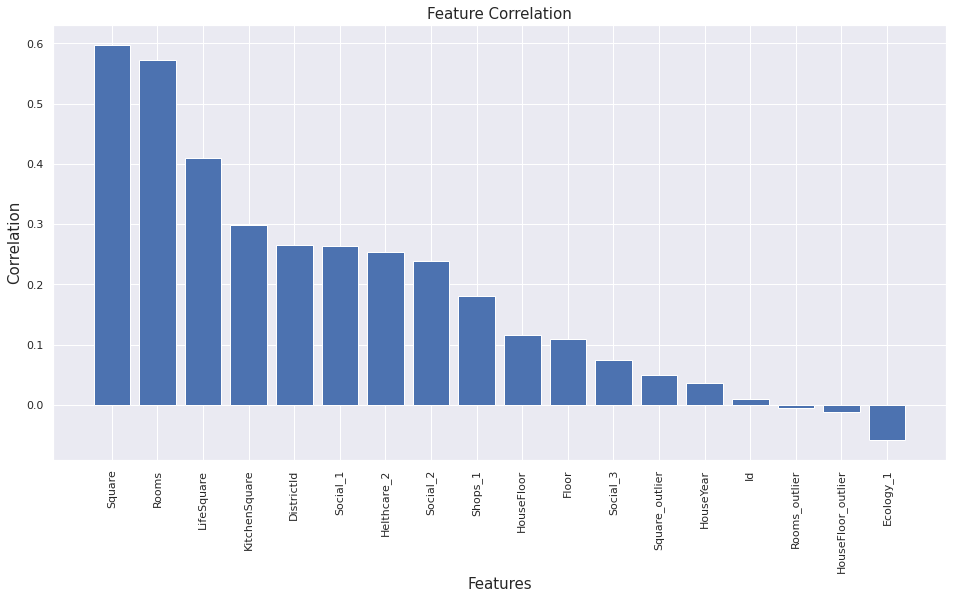

In [738]:
# Prepare Data
correlation = df_train.corrwith(df_train['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

# Draw plot
plt.figure(figsize = (16,8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')

# Decorations    
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature Correlation', fontsize=15)
plt.show()

In [739]:
df_train.corr()['Price'][['Square', 'Rooms', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Floor']]

Square           0.597803
Rooms            0.571660
LifeSquare       0.408973
KitchenSquare    0.298118
HouseFloor       0.115803
Floor            0.110054
Name: Price, dtype: float64

In [604]:
df_train['HouseFloor'].mode()[0]

17.0

In [605]:
df_train.mode()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,HouseFloor_outlier,Rooms_outlier
0,0,27,2.0,52.51331,32.78126,4.0,5.0,17.0,1977.0,0.007122,B,B,2.0,264.0,0.0,0.0,0.0,B,59174.778028,0.0,0.0
1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59877.592523,NaN,NaN
2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60502.583500,NaN,NaN
3,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60825.032060,NaN,NaN
4,10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60828.260686,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624680.099059,NaN,NaN
9996,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625678.644994,NaN,NaN
9997,9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625820.041178,NaN,NaN
9998,9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627525.072788,NaN,NaN


# Создание необходимых функций

In [ ]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        self.square_quantile = None
        self.modes = None

        self.Rooms_a = 2
        self.Rooms_b = 1
        
    def fit(self, data):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = data.median()
        self.kitchen_square_quantile = data['KitchenSquare'].quantile(.975)
        self.square_quantile = data['Square'].quantile(.995)
        # self.house_floor_mode = data['HouseFloor'].mode()[0]
        self.modes = data.mode()
    
    def transform(self, data):
        """Трансформация данных"""

        # Rooms
        
        # вводим новый столбец
        data['Rooms_outlier'] = 0
        data.loc[(df_train['Rooms'] == 0) | (data['Rooms'] >= 6), 'Rooms_outlier'] = 1

        # меняем значения в выбросах
        data.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
        data.loc[(df_train['Rooms'] >= 6) & (data['Square'] >= 50), 'Rooms'] = self.Rooms_a
        data.loc[(df_train['Rooms'] >= 6) & (data['Square'] < 50), 'Rooms'] = self.Rooms_b

        # KitchenSquare
        
        query_kitchen_square = data['KitchenSquare'] > \
             self.kitchen_square_quantile.quantile(.975)
        
        data.loc[query_kitchen_square, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        data.loc[data['KitchenSquare'] < 4, 'KitchenSquare'] = 4

        # HouseFloor, Floor
        
        # вводим новый столбец
        data['HouseFloor_outlier'] = 0
        data.loc[data['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        data.loc[data['Floor'] > data['HouseFloor'], 'HouseFloor_outlier'] = 1
        data.loc[data['Floor'] > 75, 'HouseFloor_outlier'] = 1

        # меняем значения в выбросах
        data.loc[data['HouseFloor'] == 0, 'HouseFloor'] = 1
        data.loc[data['HouseFloor'] > 75, 'HouseFloor'] = self.modes['HouseFloor'][0]


        floors_index_outliers = data[data['HouseFloor'] < data['Floor']].index
        data.loc[floors_index_outliers, 'Floor'], data.loc[floors_index_outliers, 'HouseFloor'] = \
        data.loc[floors_index_outliers, 'HouseFloor'], data.loc[floors_index_outliers, 'Floor']        

        # HouseYear
        data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2011
        data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968 

        current_year = datetime.now().year
        
        data['HouseYear_outlier'] = 0
        data.loc[data['HouseYear'] > current_year, 'HouseYear_outlier'] = 1        
        data.loc[data['HouseYear'] > current_year, 'HouseYear'] = current_year       
        
        # Healthcare_1
        if 'Healthcare_1' in data.columns:
            data.drop('Healthcare_1', axis=1, inplace=True)

        # Square

        # вводим новый столбец
        data['Square_outlier'] = 0

        query_square = data['Square'] > data['Square'].quantile(.995)
        data.loc[query_square, 'Square_outlier'] = 1

        data.loc[query_square, 'Square'] = data['Square'].median()


        # LifeSquare

        data.loc[df_train['LifeSquare'] > data['Square'], 'LifeSquare'] = data['LifeSquare'].median()

        data.fillna(self.medians, inplace=True)

        print(data.corr()['Price'][['Square', 'Rooms', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Floor']])
        
        return data